In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [119]:
import pandas as pd
import numpy as np
import warnings

from matplotlib import pyplot as plt
import seaborn as sns

# pip install phik --q
# from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, Normalizer
# from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
# pip install lightautoml['all'] --q

# from lightautoml.automl.presets.tabular_presets import TabularAutoML
# from lightautoml.tasks import Task

# from catboost import Pool, CatBoostClassifier
# from sklearn.model_selection import KFold


# !pip install lightgbm -q
# from lightgbm import Dataset
# from lightgbm import LGBMClassifier, train




N_FOLDS = 5
TIMEOUT = 4 * 60 * 60  # in seconds
N_THREADS = 8

pd.options.display.float_format = '{:_.5f}'.format
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

### Область работы 2 (поиск  модели .... )

In [ ]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

# path_train = ... # содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv('train.csv')
df.head()

,name,diameter,weight,red,green,blue
0,grapefruit,11.600,199.710,153,59,16
1,grapefruit,10.250,178.060,148,54,14
2,grapefruit,11.990,205.390,133,72,2
3,orange,7.630,139.910,152,82,2
4,orange,7.430,137.100,158,78,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7500 non-null   object 
 1   diameter  7500 non-null   float64
 2   weight    7500 non-null   float64
 3   red       7500 non-null   int64  
 4   green     7500 non-null   int64  
 5   blue      7500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 351.7+ KB


In [75]:
df.describe(include='all')

,name,diameter,weight,red,green,blue
count,7500,7_500.000,7_500.000,7_500.000,7_500.000,7_500.000
unique,2,NaN,NaN,NaN,NaN,NaN
top,grapefruit,NaN,NaN,NaN,NaN,NaN
freq,3750,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.973,175.020,153.724,76.040,11.365
std,NaN,1.945,29.154,10.346,11.741,9.036
min,NaN,2.960,86.760,115.000,31.000,2.000
25%,NaN,8.468,152.375,147.000,68.000,2.000
50%,NaN,9.980,175.000,154.000,76.000,10.000
75%,NaN,11.480,197.722,161.000,84.000,17.000


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('name', axis=1), df['name'],
                                                    test_size=0.25,
                                                    stratify=df['name']
                                                    )

In [84]:
X_train.tail()

,diameter,weight,red,green,blue
6150,11.380,196.520,157,70,27
7456,8.460,152.430,139,75,7
1487,8.540,153.360,161,93,3
3306,12.100,207.050,150,69,2
2162,8.050,146.310,152,81,2


In [87]:
cls_knn = KNeighborsClassifier()
cls_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
cls_knn.score(X_train, y_train)

0.9392

In [89]:
cls_knn.score(X_test, y_test)

0.9184

In [90]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)

X_test_scal = scaler.transform(X_test)

In [91]:
cls_knn.fit(X_train_scal, y_train)

KNeighborsClassifier()

In [92]:
cls_knn.score(X_train_scal, y_train)

0.9395555555555556

In [93]:
cls_knn.score(X_test_scal, y_test)

0.9216

In [96]:
cls_knn = KNeighborsClassifier()
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

score_cv = cross_val_score(cls_knn, X_train_scal, y_train, cv=5, n_jobs=-1)

In [97]:
score_cv

array([0.93244444, 0.93422222, 0.90577778, 0.90666667, 0.91555556])

In [103]:
pipe_knn = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [121]:
pipe_knn = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), Normalizer()],
    'knn': [KNeighborsClassifier()],
    'knn__n_neighbors': [10, 15, 20, 25, 30],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3]
}

gs_cv = GridSearchCV(
    pipe_knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn': [KNeighborsClassifier()],
                         'knn__n_neighbors': [10, 15, 20, 25, 30],
                         'knn__p': [1, 2, 3],
                         'knn__weights': ['uniform', 'distance'],
                         'scaler': [StandardScaler(), RobustScaler(),
                                    Normalizer()]},
             return_train_score=True, scoring='accuracy')

In [123]:
cv_result = pd.DataFrame(gs_cv.cv_results_).sort_values(by=['rank_test_score', 'std_test_score']).T
cv_result

,77,53,41,89,72,73,71,65,84,88,78,87,59,81,66,35,67,70,42,85,63,74,60,34,47,43,48,69,20,50,61,51,30,31,64,75,76,23,82,46,83,68,52,29,56,86,36,33,38,79,45,54,12,37,62,5,39,57,28,40,22,58,25,49,55,17,7,32,6,80,27,2,24,15,9,11,4,21,0,44,1,3,18,10,19,8,26,16,13,14
mean_fit_time,0.01080,0.01500,0.01160,0.00960,0.01080,0.01900,0.00940,0.00960,0.01220,0.01140,0.01280,0.01000,0.01540,0.01100,0.01260,0.01100,0.01360,0.01180,0.01120,0.01320,0.01140,0.01300,0.01280,0.01220,0.01080,0.02020,0.01180,0.01080,0.01420,0.01300,0.01320,0.01140,0.01120,0.01880,0.01240,0.01180,0.01280,0.01300,0.01320,0.01240,0.01100,0.01420,0.01280,0.01680,0.01000,0.01020,0.01280,0.01060,0.01120,0.01180,0.02100,0.01140,0.01060,0.01080,0.01160,0.01220,0.01440,0.01420,0.01180,0.01340,0.01500,0.01300,0.01380,0.01420,0.01260,0.02220,0.01620,0.00960,0.01180,0.01660,0.01100,0.01480,0.01160,0.01120,0.01820,0.01380,0.01700,0.01140,0.01860,0.01160,0.01720,0.01900,0.01440,0.01320,0.01140,0.01080,0.00980,0.01420,0.01900,0.01500
std_fit_time,0.00075,0.01053,0.00163,0.00102,0.00117,0.01313,0.00120,0.00049,0.00279,0.00080,0.00223,0.00089,0.00496,0.00089,0.00427,0.00126,0.00242,0.00147,0.00213,0.00160,0.00136,0.00063,0.00248,0.00172,0.00040,0.01492,0.00133,0.00160,0.00993,0.00477,0.00098,0.00301,0.00117,0.00585,0.00102,0.00240,0.00098,0.00358,0.00194,0.00120,0.00141,0.00643,0.00117,0.01170,0.00063,0.00098,0.00387,0.00049,0.00098,0.00117,0.01254,0.00150,0.00080,0.00075,0.00242,0.00117,0.00307,0.00354,0.00133,0.00174,0.00506,0.00167,0.00147,0.00172,0.00326,0.01618,0.00172,0.00049,0.00075,0.00958,0.00063,0.00214,0.00049,0.00147,0.00542,0.00567,0.00335,0.00102,0.00403,0.00080,0.00223,0.01460,0.00488,0.00194,0.00080,0.00075,0.00075,0.00319,0.00785,0.01014
mean_score_time,0.02640,0.06100,0.01820,0.06860,0.07400,0.10220,0.06700,0.01800,0.15330,0.11740,0.09920,0.11781,0.02040,0.02580,0.16240,0.05980,0.16920,0.11460,0.07360,0.20512,0.03180,0.08160,0.07260,0.08200,0.01820,0.10180,0.14100,0.09760,0.10000,0.13160,0.09540,0.11720,0.14660,0.17020,0.02320,0.02900,0.03000,0.01700,0.02560,0.02200,0.01940,0.12940,0.09140,0.01840,0.07620,0.13972,0.10880,0.08040,0.06860,0.08020,0.03000,0.07120,0.14420,0.08160,0.07340,0.01440,0.02620,0.02840,0.02140,0.03920,0.02300,0.02500,0.08580,0.17520,0.08480,0.05940,0.07880,0.11400,0.07680,0.08340,0.01940,0.10100,0.06940,0.07540,0.01880,0.01240,0.02200,0.02720,0.08500,0.07620,0.08560,0.01960,0.08120,0.01840,0.07500,0.07460,0.07880,0.07720,0.12240,0.11460
std_score_time,0.01384,0.01053,0.00204,0.00575,0.01616,0.03544,0.01049,0.00089,0.01413,0.02007,0.04117,0.01926,0.00524,0.00213,0.02805,0.00999,0.03679,0.02431,0.00662,0.05536,0.01243,0.01437,0.00476,0.00438,0.00491,0.03511,0.01045,0.00508,0.02964,0.04155,0.03084,0.02877,0.01769,0.03608,0.00160,0.00316,0.00540,0.00559,0.00102,0.00110,0.00136,0.03444,0.00683,0.00393,0.01868,0.05225,0.05370,0.00418,0.01513,0.01096,0.01724,0.00757,0.04697,0.01689,0.01578,0.00242,0.00232,0.00287,0.00136,0.01933,0.00268,0.00210,0.01794,0.04588,0.02864,0.02222,0.01246,0.02760,0.01187,0.02413,0.00185,0.02861,0.00273,0.01440,0.00319,0.00049,0.00316,0.00725,0.00921,0.01477,0.01061,0.00206,0.01150,0.00136,0.00434,0.01348,0.02537,0.01607,0.01013,0.02972
param_knn,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighbor

In [124]:
cv_result.loc['params', 72]

{'knn': KNeighborsClassifier(),
 'knn__n_neighbors': 30,
 'knn__p': 1,
 'knn__weights': 'uniform',
 'scaler': StandardScaler()}

In [128]:
gs_cv.best_params_

{'knn': KNeighborsClassifier(),
 'knn__n_neighbors': 30,
 'knn__p': 1,
 'knn__weights': 'distance',
 'scaler': Normalizer()}

In [125]:
pipe_final_knn = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(
            n_neighbors=30,
            weights='uniform',
            p=1
        ))
    ]
)
pipe_final_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=30, p=1))])

In [126]:
pipe_final_knn.score(X_train, y_train)

0.9267555555555556

In [127]:
pipe_final_knn.score(X_test, y_test)

0.9306666666666666

interval columns not set, guessing: ['diameter', 'weight', 'red', 'green', 'blue']


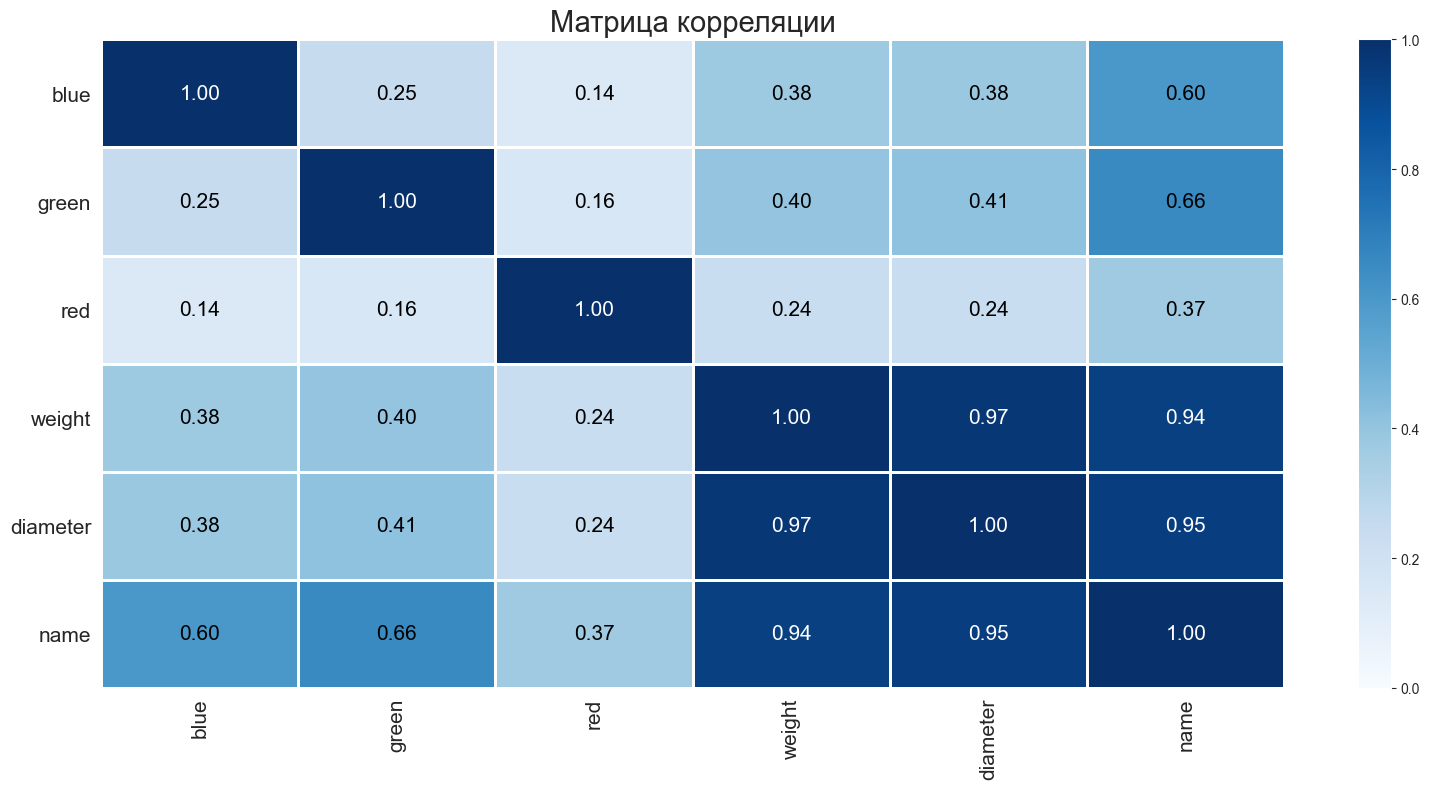

In [6]:
ph_view = df.phik_matrix()
plot_correlation_matrix(ph_view.values,
                        x_labels=ph_view.columns,
                        y_labels=ph_view.index,
                        vmin=0, vmax=1, color_map='Blues',
                        title='Матрица корреляции',
                        fontsize_factor=1.5,
                        identity_layout=True,
                        figsize=(16, 8))
plt.tight_layout()

In [44]:
target = df['name']
df_train = df.drop('name', axis=1, errors='ignore')
le = LabelEncoder()
target_encode = le.fit_transform(target)
print(df_train.shape)

(7500, 5)


In [45]:
X_train, X_val, y_train, y_val = train_test_split(
    df_train, target_encode,
    test_size=0.3,
    shuffle=True,
    stratify=target_encode,
)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(5250, 5) (5250,)
(2250, 5) (2250,)


In [46]:
num_pipeline = Pipeline(steps=[('scale', RobustScaler()),])

col_trans = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_exclude='object')),
    remainder='passthrough', n_jobs=-1, verbose=False,
)

In [47]:
# Получу нормальные наименования колонок после работы pipeline
def get_col_name(pipe) -> list:
    column_name = pd.DataFrame(pipe.get_feature_names_out())
    column_name = column_name[0].apply(lambda x: x.split('__'))
    column_name = column_name.apply(lambda x: x[1]).tolist()
    return column_name

In [48]:
X_train_scal = pd.DataFrame(col_trans.fit_transform(X_train))
X_train_scal.columns = get_col_name(col_trans)

X_val_scal = pd.DataFrame(col_trans.transform(X_val))
X_val_scal.columns = get_col_name(col_trans)

# LGBMClassifier

In [53]:
train_data = Dataset(X_train_scal, y_train, free_raw_data=False)
val_data = Dataset(X_val_scal, y_val, free_raw_data=False)

In [56]:
params = {
    "objective": "binary",
    "max_depth": 16,
    "verbosity": -1,
}

booster = train(params, train_set=train_data, valid_sets=val_data)

In [65]:
test_preds = booster.predict(X_val_scal)
print(f'Accuracy {accuracy_score(y_val, (test_preds > 0.5).astype(int)):0.4f}')

Accuracy 0.9742


# CatboostClassifier

In [72]:
%%time

n_splits = 5
models = []
scores = []

X = pd.DataFrame(col_trans.fit_transform(df_train))
X.columns = get_col_name(col_trans)
y = pd.Series(target_encode)

kf = KFold(n_splits=n_splits, shuffle=True)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Специальный класс для ускорения обучения
    train_dataset = Pool(data=X_train, label=y_train, )
    eval_dataset = Pool(data=X_test, label=y_test, )

    model = CatBoostClassifier(
        depth=16,
        iterations=3500,
        learning_rate=0.001,
        loss_function="Logloss",
        custom_metric=["Accuracy"],
        logging_level='Silent',

        # Регуляризация и ускорение
        colsample_bylevel=0.098,
        subsample=0.95,
        l2_leaf_reg=9,
        min_data_in_leaf=243,
        max_bin=187,
        random_strength=1,

        # Параметры ускорения
        task_type="CPU",
        thread_count=-1,
        bootstrap_type="Bernoulli",
        auto_class_weights="SqrtBalanced",
        early_stopping_rounds=50
    )

    models.append(model)

    model.fit(
        train_dataset,
        eval_set=eval_dataset,
        use_best_model=True,
        plot=False)

    scores.append(np.mean([v for k, v in model.best_score_["validation"].items() if "Accuracy" in k], dtype="float16"))

assert len(models) == n_splits
print(f'mean Accuracy {np.mean(scores, dtype="float16") - np.std(scores, dtype="float16")}')

mean Recall score ---------> 0.904
CPU times: total: 1min 56s
Wall time: 27.9 s


In [18]:
print(f'Accuracy: {acc_score(tr_data["name"].values, oof_pred.data[:, 0])}')

score: 0.9836
